In [3]:
# Pandas is a package containing additional functions to use data frames in Python
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import numpy as np
import seaborn as sns
warnings.simplefilter('ignore')
# These two lines allow the notebook to access the Google Drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
# This is the path to the project folder within the Google Drive.
file_path = "/content/drive/My Drive/"

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


---
## Notebook 16
# Comparing Species Distribution Models

We need to check which SDM had the best test result for every species and put this information into a table.

The results for each species are saved in the SDM_models folder.

The code to do this for one species is below, but it would be good to be able to run this automatically for every species - try to put the marked code inside a for loop to do this.


This list contains all the species names.

In [6]:
species_list = [line.strip() for line in open(file_path + "species_names.tsv")]


In [7]:
model_testing_results = pd.DataFrame(columns=['glm', 'bioclim', 'random_forest'])

for species in species_list:
  try:
    results = pd.read_csv(file_path + "/SDM_results/" + species + "testing.tsv", sep="\t")
    results_glm = sum(results['test_result_glm'] == results['p']) / len(results)
    results_bioclim = sum(results['test_result_bioclim'] == results['p']) / len(results)
    results_rf = sum(results['test_result_rf'] == results['p']) / len(results)
    model_testing_results.loc[species] = [results_glm, results_bioclim, results_rf]
  except:
    pass

model_testing_results.to_csv(file_path + "/SDM_models/SDM_testing_results.tsv", sep="\t")


In [8]:
model_testing_results


,glm,bioclim,random_forest
Acromyrmex_echinatior,1.000000,1.000000,1.000000
Amblyomma_americanum,0.894231,0.923077,0.932692
Apis_cerana,0.910233,0.843806,0.992819
Apis_mellifera,0.939329,0.573502,0.997868
Athalia_rosae,0.897177,0.762097,0.985887
Biorhiza_pallida,0.877419,0.861290,0.987097
Bombus_terrestris,0.983703,0.972489,0.998951
Camponotus_castaneus,0.965035,0.890443,0.983683
Camponotus_floridanus,1.000000,1.000000,0.990826
Camponotus_japonicus,0.826087,0.913043,0.869565


You already have code to draw a bar plot of these results for one species, see if you can adapt this to draw a bar plot for all of the species based on the model_testing_results table.

Based on these results, select which model is most often the best - we can use that for the next step.

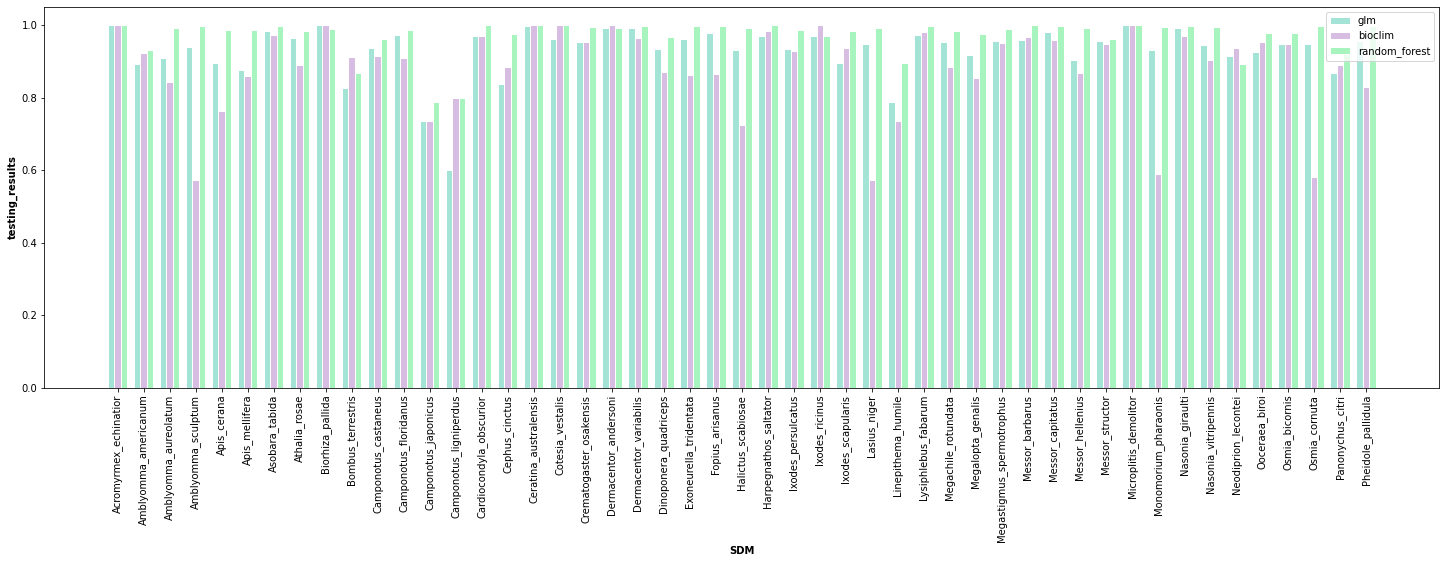

In [9]:

barWidth = 0.25
plt.figure(figsize=(25, 7))
a = plt.subplot(111)
bars1 = model_testing_results['glm']
bars2 = model_testing_results['bioclim']
bars3 = model_testing_results['random_forest']

r1 = np.arange(len(bars1))
r2 = r1 + barWidth
r3 = r2 + barWidth

plt.bar(r1, bars1, color='#a3e4d7', width=barWidth, edgecolor='white', label='glm')
plt.bar(r2, bars2, color='#d7bde2', width=barWidth, edgecolor='white', label='bioclim')
plt.bar(r3, bars3, color='#a7f4be', width=barWidth, edgecolor='white', label='random_forest')
plt.xlabel('SDM', fontweight='bold')
plt.ylabel('testing_results', fontweight='bold')

plt.xticks(r2, species_list, rotation='vertical')
plt.legend()
plt.savefig(file_path + "/SDM_models/model_testing_results_plot.png", dpi=300, bbox_inches='tight' )
plt.show()

---

It would also be useful to plot the map predictions for all the combinations of model, ssp and timepoint.

All of the predictions are saved in the "SDM_results" folder.

This code just plots one example, please try to adapt it to run for every example and save the plot in the google drive.




These lists contain all the model names, scenario names, time periods and SDMs.

In [10]:
species_list = [line.strip() for line in open(file_path + "species_names.tsv")]

models = ['BCC-CSM2-MR',
         'CanESM5']
scenarios = ['ssp126', 'ssp585']

time_periods = ['2021-2040', '2041-2060', '2061-2080', '2081-2100']

# swap this for whichever model was best in the previous step
sdm = 'rf'

To run these multiple loops (called nested loops), we use the following (at the moment this code will just print the combinations).

In [ ]:
for model in models:
  for ssp in scenarios:
    for timepoint in time_periods:
      for species_name in species_list:
        if os.path.exists(file_path + "SDM_results/" + species_name + "/" + model + "_" + ssp + "_" + timepoint + "__" + sdm + ".npy"):
          # do everything here for every combination
          # read one results matrix
          N = np.load(file_path + "SDM_results/" + species_name + "/" + model + "_" + ssp + "_" + timepoint + "__" + sdm + ".npy")

# generate an empty figure
          f = plt.figure(figsize=(10, 10))
          plt.subplot(1, 1, 1)

# add a subplot at position 1 in a 1x2 grid
          plt.imshow(N, cmap='Paired')

          plt.savefig(file_path + "SDM_maps/" + species_name + "_" + model + "_" + ssp + "_" + timepoint + ".png", dpi=300, bbox_inches='tight')

          plt.close()
          print (model, ssp, timepoint, species_name)

BCC-CSM2-MR ssp126 2021-2040 Acromyrmex_echinatior
BCC-CSM2-MR ssp126 2021-2040 Amblyomma_americanum
BCC-CSM2-MR ssp126 2021-2040 Apis_cerana
BCC-CSM2-MR ssp126 2021-2040 Apis_mellifera
BCC-CSM2-MR ssp126 2021-2040 Athalia_rosae
BCC-CSM2-MR ssp126 2021-2040 Biorhiza_pallida
BCC-CSM2-MR ssp126 2021-2040 Bombus_terrestris
BCC-CSM2-MR ssp126 2021-2040 Camponotus_castaneus
BCC-CSM2-MR ssp126 2021-2040 Camponotus_floridanus
BCC-CSM2-MR ssp126 2021-2040 Camponotus_japonicus
BCC-CSM2-MR ssp126 2021-2040 Camponotus_ligniperdus
BCC-CSM2-MR ssp126 2021-2040 Cardiocondyla_obscurior
BCC-CSM2-MR ssp126 2021-2040 Cephus_cinctus
BCC-CSM2-MR ssp126 2021-2040 Crematogaster_osakensis
BCC-CSM2-MR ssp126 2021-2040 Dermacentor_andersoni
BCC-CSM2-MR ssp126 2021-2040 Dermacentor_variabilis
BCC-CSM2-MR ssp126 2021-2040 Dinoponera_quadriceps
BCC-CSM2-MR ssp126 2021-2040 Exoneurella_tridentata
BCC-CSM2-MR ssp126 2021-2040 Halictus_scabiosae
BCC-CSM2-MR ssp126 2021-2040 Ixodes_persulcatus
BCC-CSM2-MR ssp126 2021

The code below plots a map for one of the SDM datasets.

In [ ]:
species_name = 'Lasius_niger'
ssp = 'ssp126'
model = 'CanESM5'
timepoint = '2081-2100'

# swap this for gdm or bioclim if these models performed better overall
sdm = 'rf'


# read one results matrix
N = np.load(file_path + "SDM_results/" + species_name + "/" + model + "_" + ssp + "_" + timepoint + "__" + sdm + ".npy")

# generate an empty figure
f = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)

# add a subplot at position 1 in a 1x2 grid
plt.imshow(N, cmap='Paired')

plt.savefig(file_path + "SDM_maps/" + species_name + "_" + model + "_" + ssp + "_" + timepoint + ".png", dpi=300, bbox_inches='tight')

plt.close()